In [59]:
# Importing packages
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

import scipy.stats as scs
from scipy.stats import t
from scipy.stats import norm

import statsmodels.api as sm
from statsmodels.formula.api import ols
from Functions import func_rename, func_conversion



Krav på rapport: Rapporten kan utformas på valfritt sätt, men skall baseras på element från
kursen, t.ex.:  
• Deskriptiva mått som medelvärde, median och standardavvikelse  
• Konfidensintervall  
• Hypotestest  
• Korrelationsanalys  
• Linjär regression  
OBS! - Rapporten behöver inte beskriva hela data-setet i detalj. Välj ut ett fåtal  
variabler/features att fokusera på. Det är viktigare med en bra frågeställning och en tydlig
analys kring frågeställningen, än att inkludera ”så mycket som möjligt”.  
Basera rapporten på statistiska mått och metoder vi gått igenom i kursen. Att inkludera   
massor av andra beräkningspaket/inferensmetoder/etc ger inte högre möjlighet till VG  

In [60]:
filepath = "../Lab/Data/cars.csv"
df = pd.read_csv(filepath)

In [61]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [62]:
print(df[df["name"].str.contains("volkswagen", case=False, flags=0, na=None, regex=False)]) # Finding out how i can find specific makes in data set.

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
19   26.0          4          97.0        46.0    1835          20.5   
55   27.0          4          97.0        60.0    1834          19.0   
59   23.0          4          97.0        54.0    2254          23.5   
77   22.0          4         121.0        76.0    2511          18.0   
102  26.0          4          97.0        46.0    1950          21.0   
142  26.0          4          79.0        67.0    1963          15.5   
172  25.0          4          90.0        71.0    2223          16.5   
175  29.0          4          90.0        70.0    1937          14.0   
203  29.5          4          97.0        71.0    1825          12.2   
233  29.0          4          97.0        78.0    1940          14.5   
240  30.5          4          97.0        78.0    2190          14.1   
244  43.1          4          90.0        48.0    1985          21.5   
278  31.5          4          89.0        71.0    1990          

In [63]:
#Prediction? Do we need to use data points outside of data set, or can we use datapoints in our data set. For example "Forget the datapoint"
# Least squares.
#

# b0 är intercept. 

In [64]:
# Creating a copy of df called errors. So that i can later insert my new dataframe into the original dataframe
df_errors = df.copy()

#Splitting columns into make and model.
df_errors[["name", "test"]] = df_errors["name"].str.split(" ", 1, expand=True)
df_errors.rename(columns={"name": "make", "test": "model", "mpg": "lper100km"}, inplace=True)
cars = df_errors
# Creating simple function for renaming spelling errors in cars dataframe

# renaming brands into correct spelling. found by using cars["make"].valuecounts() and checking manually.
func_rename(cars,"vw","volkswagen"), func_rename(cars,"vokswagen","volkswagen")
func_rename(cars,"chevy","chevrolet"), func_rename(cars,"chevroelt","chevrolet")
func_rename(cars,"maxda","mazda"), func_rename(cars,"toyouta", "toyota")
func_rename(cars,"mercedes-benz", "mercedes"),



C:\Users\Agam\AppData\Local\Temp\ipykernel_11940\1347622836.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_errors[["name", "test"]] = df_errors["name"].str.split(" ", 1, expand=True)


(None,)

In [65]:
# Checking amount of unique values

print("Amount of cylinders per unique value\n",cars["cylinders"].value_counts()) # Amount of unique number of cylinders.
# We can see that only 4 3cylinders and 3 5cylinders.
# Lets get some more info about those cars.

print("Cars with 3 cylinders\n",cars[cars["cylinders"] == 3]) #Printing out the amount of cars with each 3 or 5 cylinders.
print("Cars with 5 cylinders\n",cars[cars["cylinders"] == 5])
# From this information we can see that cars with 3 and 5 cylinders are mostly preformance cars from europe and japan. So it would not be wise to remove them.

Amount of cylinders per unique value
 4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64
Cars with 3 cylinders
      lper100km  cylinders  displacement  horsepower  weight  acceleration  \
71        19.0          3          70.0        97.0    2330          13.5   
111       18.0          3          70.0        90.0    2124          13.5   
243       21.5          3          80.0       110.0    2720          13.5   
334       23.7          3          70.0       100.0    2420          12.5   

     model_year origin   make      model  
71           72  japan  mazda  rx2 coupe  
111          73  japan  mazda        rx3  
243          77  japan  mazda       rx-4  
334          80  japan  mazda    rx-7 gs  
Cars with 5 cylinders
      lper100km  cylinders  displacement  horsepower  weight  acceleration  \
274       20.3          5         131.0       103.0    2830          15.9   
297       25.4          5         183.0        77.0    3530          20.1   
327      

In [66]:
#conversion variables
pounds_to_kg = 0.45359237 
mpg_to_lp100km = 235.215

# func for converting values in dataframe.


In [67]:
cars["make"].value_counts().sort_values(ascending=True)

nissan         1
hi             1
capri          1
triumph        1
bmw            2
cadillac       2
mercedes       3
subaru         4
opel           4
saab           4
renault        5
chrysler       6
volvo          6
audi           7
peugeot        8
fiat           8
oldsmobile    10
mercury       11
mazda         12
honda         13
pontiac       16
buick         17
volkswagen    22
datsun        23
toyota        26
dodge         28
amc           28
plymouth      31
chevrolet     47
ford          51
Name: make, dtype: int64

In [68]:
#changing weight into kg's
func_conversion(cars, pounds_to_kg, "weight")
#changing 
func_conversion(cars, mpg_to_lp100km,"lper100km")


TypeError: func_conversion() takes 2 positional arguments but 3 were given

In [ ]:
cars["lper100km"].sort_values(ascending=False)

28     26.14
25     23.52
26     23.52
27     21.38
103    21.38
       ...  
326     5.42
394     5.35
325     5.31
329     5.27
322     5.05
Name: lper100km, Length: 398, dtype: float64

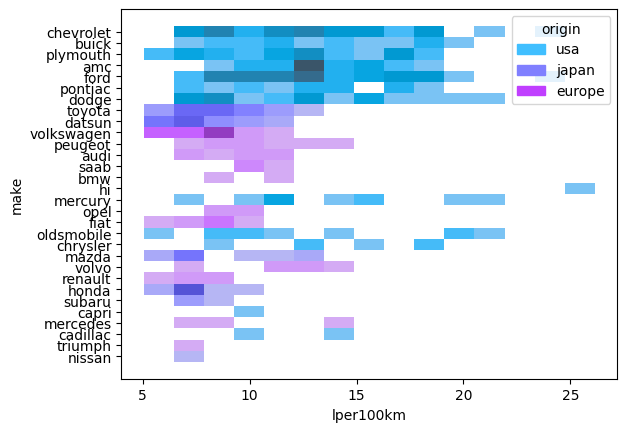

In [ ]:
sns.histplot(data=cars, x="lper100km", y="make", hue="origin", palette="cool")
plt.show()

Text(0.5, 0, 'cylinders')

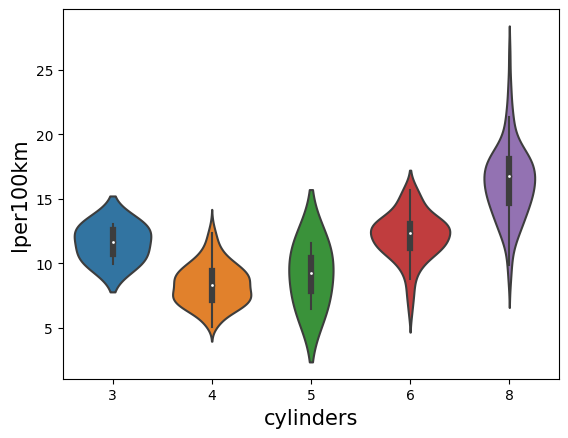

In [ ]:
fig = sns.violinplot(data = cars, x="cylinders", y="lper100km", )
fig.set_ylabel("lper100km", fontsize=15)
fig.set_xlabel("cylinders", fontsize=15)


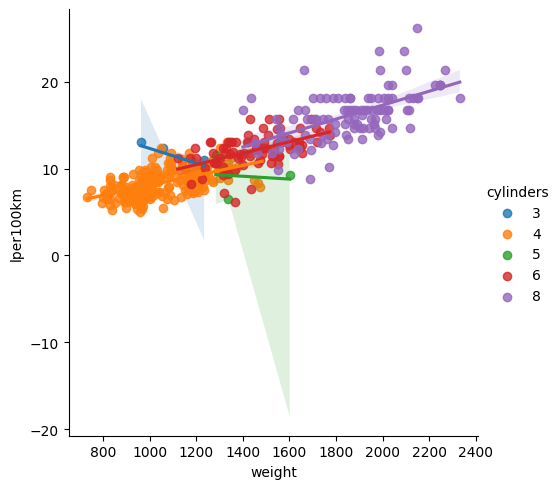

In [ ]:
fig = sns.lmplot(data = cars, x="weight", y="lper100km", hue="cylinders")
#fig.set_ylabel("lper100km", fontsize=15)
#fig.set_xlabel("weight", fontsize=15)

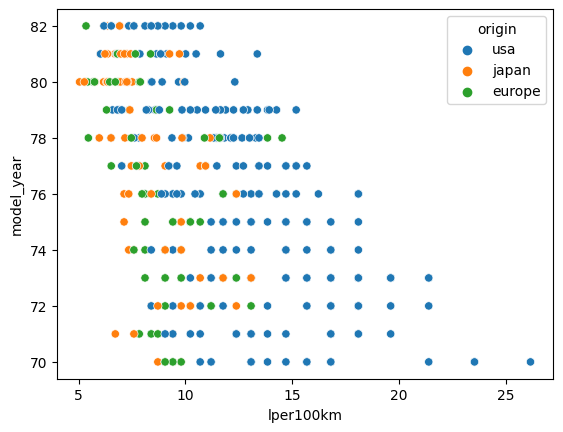

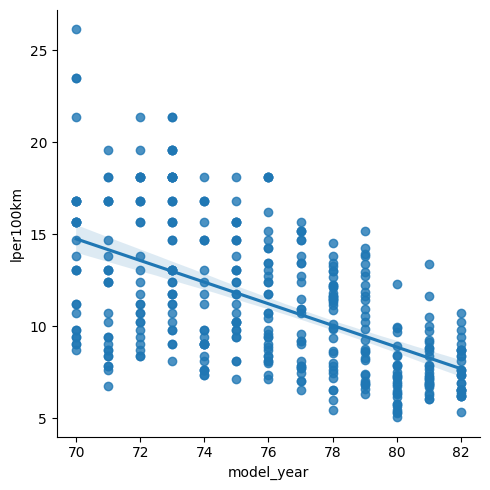

In [ ]:
sns.scatterplot(data=cars, x="lper100km", y="model_year", hue="origin",)
sns.lmplot(data=cars, y="lper100km", x="model_year")

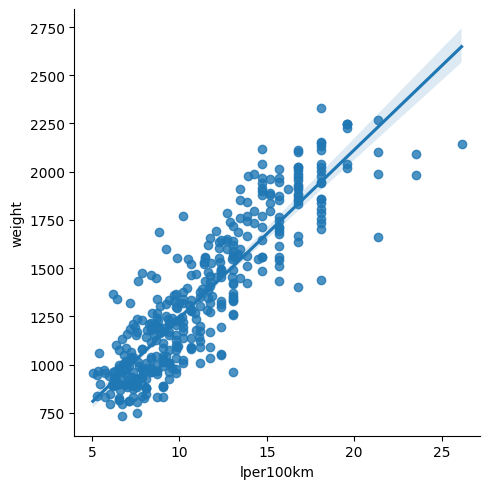

In [ ]:
sns.lmplot(data=cars, y='weight', x='lper100km',)

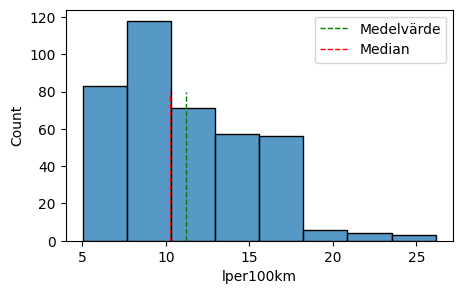

In [ ]:
fig, ax = plt.subplots(figsize=(5,3))
test = "lper100km"
sns.histplot(cars, x=test, bins=8); # Plotta test som histogram med 8 bins

### Medelvärde och median
mass_mean = cars[test].mean() # Beräkna medelvärde för test
mass_median = cars[test].median() # Beräkna medianvärde för test
plt.plot([mass_mean, mass_mean], [0, 80], color='green', linestyle='--', linewidth=1, label='Medelvärde') # Plotta medelvärde för test med streckad grön linje
plt.plot([mass_median, mass_median], [0, 80], color='red', linestyle='--', linewidth=1, label='Median') # Plotta medianvärde för test med streckad röd linje

### Legend
leg = plt.legend(loc='upper right') # Rita legend för medelvärde och median i övre högra hörnet
plt.show()

In [ ]:
corr = cars.corr()
corr

C:\Users\Agam\AppData\Local\Temp\ipykernel_21020\1634332192.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cars.corr()


,lper100km,cylinders,displacement,horsepower,weight,acceleration,model_year
lper100km,1.000000,0.839260,0.866599,0.854792,0.885181,-0.455704,-0.557491
cylinders,0.839260,1.000000,0.950721,0.842983,0.895995,-0.505419,-0.348746
displacement,0.866599,0.950721,1.000000,0.897257,0.932812,-0.543684,-0.370164
horsepower,0.854792,0.842983,0.897257,1.000000,0.864540,-0.689196,-0.416361
weight,0.885181,0.895995,0.932812,0.864540,1.000000,-0.417451,-0.306539
acceleration,-0.455704,-0.505419,-0.543684,-0.689196,-0.417451,1.000000,0.288137
model_year,-0.557491,-0.348746,-0.370164,-0.416361,-0.306539,0.288137,1.000000


In [ ]:
cars.sample()
r, p = scs.pearsonr(cars['lper100km'], cars['weight'])
r, p

(0.885181261095641, 1.1426960574084093e-133)

In [ ]:
cars.rename(columns={"l/km": "lper100km"}, inplace=True)
cars["lper100km"]

0      13.07
1      15.68
2      13.07
3      14.70
4      13.84
       ...  
393     8.71
394     5.35
395     7.35
396     8.40
397     7.59
Name: lper100km, Length: 398, dtype: float64

In [ ]:

model = ols('lper100km ~ weight', data=cars).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              lper100km   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     1433.
Date:                Thu, 02 Feb 2023   Prob (F-statistic):          1.14e-133
Time:                        09:28:45   Log-Likelihood:                -801.52
No. Observations:                 398   AIC:                             1607.
Df Residuals:                     396   BIC:                             1615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9011      0.333     -2.709      0.0

In [ ]:
ypred = model.predict(cars['weight'])
ypred


0      13.385466
1      14.158683
2      13.115738
3      13.097757
4      13.160693
         ...    
393    10.481403
394     7.784132
395     8.458450
396     9.807086
397    10.193694
Length: 398, dtype: float64

<AxesSubplot: >

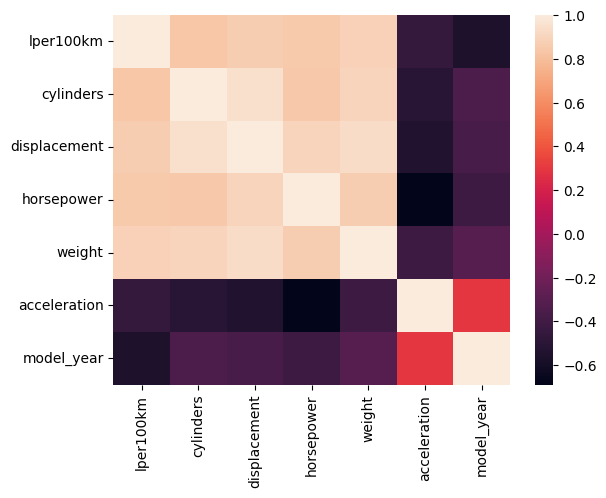

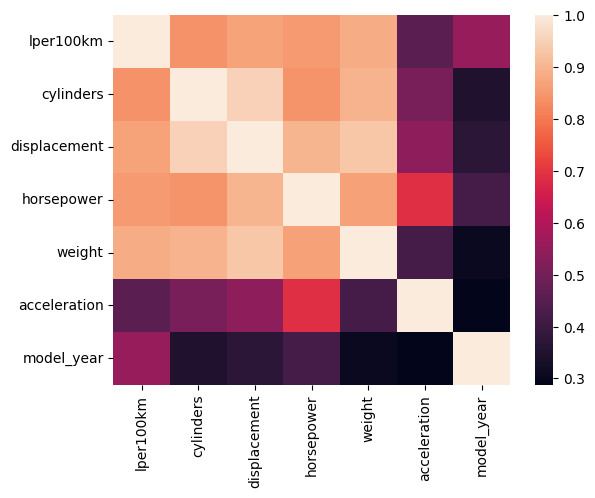

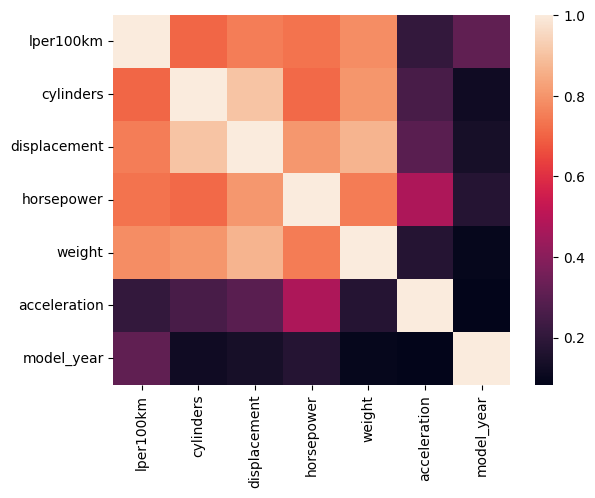

In [ ]:
sns.heatmap(corr)
plt.figure()
sns.heatmap(abs(corr))
plt.figure()
sns.heatmap(corr**2) # Oftast denna vi kollar på. Då vi vill ha ett tal mellan 0 och 1


In [ ]:
# Regression testing: 

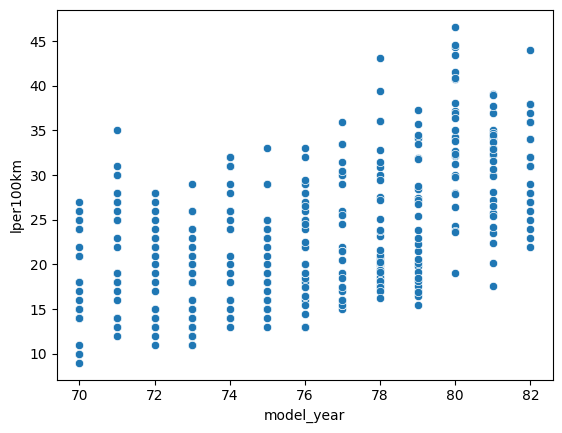

In [ ]:
sns.scatterplot(data=cars, x='model_year', y='lper100km')
plt.show()

In [ ]:
model = ols('model_year ~ lper100km', data=cars).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             model_year   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     200.0
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           4.84e-37
Time:                        13:36:16   Log-Likelihood:                -1003.3
No. Observations:                 398   AIC:                             2011.
Df Residuals:                     396   BIC:                             2019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.5661      0.480    144.889      0.0

In [ ]:
r,p=scs.pearsonr(cars['model_year'], cars['lper100km'])
print(r, p)

0.5792671330833093 4.844935813365759e-37


In [ ]:
ypred = model.predict(cars['lper100km'])
ypred

0      74.498822
1      73.676694
2      74.498822
3      73.950736
4      74.224779
         ...    
393    76.965206
394    81.623932
395    78.335420
396    77.239249
397    78.061377
Length: 398, dtype: float64

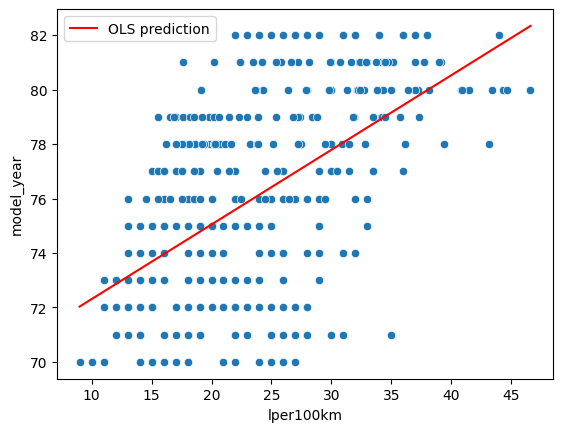

In [ ]:
scatterplot = sns.scatterplot(data=cars, x='lper100km', y='model_year')

scatterplot.plot([cars['lper100km'].min(), cars['lper100km'].max()],
                  [ypred.min(), ypred.max()],
                  "r", label="OLS prediction")
scatterplot.legend(loc="best")
plt.show()

In [ ]:
r, p = scs.pearsonr(cars['lper100km'], cars['model_year'])
r, p

(0.5792671330833093, 4.844935813365759e-37)

In [ ]:
model = ols('lper100km ~ model_year', data=cars).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              lper100km   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     200.0
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           4.84e-37
Time:                        13:48:23   Log-Likelihood:                -1301.2
No. Observations:                 398   AIC:                             2606.
Df Residuals:                     396   BIC:                             2614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -69.5556      6.589    -10.556      0.0

In [ ]:
predictions = model.get_prediction(cars['model_year'])

frame=predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

frame[['obs_ci_lower','obs_ci_upper']]

,obs_ci_lower,obs_ci_upper
0,3.557020,28.754166
1,3.557020,28.754166
2,3.557020,28.754166
3,3.557020,28.754166
4,3.557020,28.754166
...,...,...
393,18.250645,43.447237
394,18.250645,43.447237
395,18.250645,43.447237
396,18.250645,43.447237


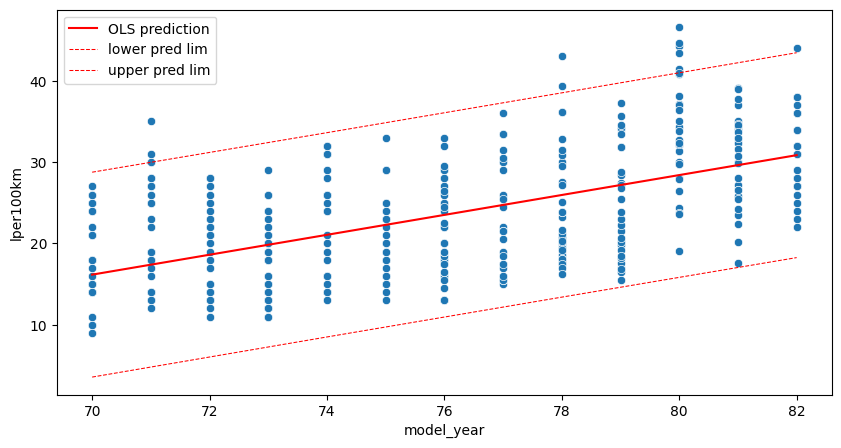

In [ ]:
order = np.argsort(cars['model_year'])
xs = np.array(cars['model_year'])[order]
# ys = np.array(frame['obs_ci_lower'])[order]

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=cars, x='model_year', y='lper100km')
ax.plot(cars['model_year'], ypred, "r", label="OLS prediction")

order = np.argsort(cars['model_year'])
x = np.array(cars['model_year'])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)


ax.legend(loc="best")
plt.show()


In [ ]:
r, p = scs.pearsonr(cars['model_year'], cars['lper100km']) # flipper = model_year, Body mass = lper100km
r, p


(0.5792671330833093, 4.844935813365759e-37)

In [ ]:
model = ols('model_year ~ lper100km', data=cars).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             model_year   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     200.0
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           4.84e-37
Time:                        13:51:40   Log-Likelihood:                -1003.3
No. Observations:                 398   AIC:                             2011.
Df Residuals:                     396   BIC:                             2019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.5661      0.480    144.889      0.0

In [ ]:
predictions = model.get_prediction(cars['lper100km'])

frame=predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

frame[['obs_ci_lower','obs_ci_upper']]

,obs_ci_lower,obs_ci_upper
0,68.554593,80.443051
1,67.727328,79.626059
2,68.554593,80.443051
3,68.003327,79.898146
4,68.279081,80.170477
...,...,...
393,71.023207,82.907205
394,75.632370,87.615495
395,72.386115,84.284725
396,71.296276,83.182221


In [ ]:
order = np.argsort(cars['lper100km'])
xs = np.array(cars['lper100km'])[order]
ys = np.array(frame['obs_ci_lower'])[order]

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=cars, x='lper100km', y='model_year')
ax.plot(cars['lper100km'], ypred, "r", label="OLS prediction")

order = np.argsort(cars['lper100km'])
x = np.array(cars['lper100km'])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)


ax.legend(loc="best")
plt.show()

IndexError: index 366 is out of bounds for axis 0 with size 332

        lper100km
0        0.000000
1      151.057402
2      302.114804
3      453.172205
4      604.229607
..            ...
327  49395.770393
328  49546.827795
329  49697.885196
330  49848.942598
331  50000.000000

[332 rows x 1 columns]


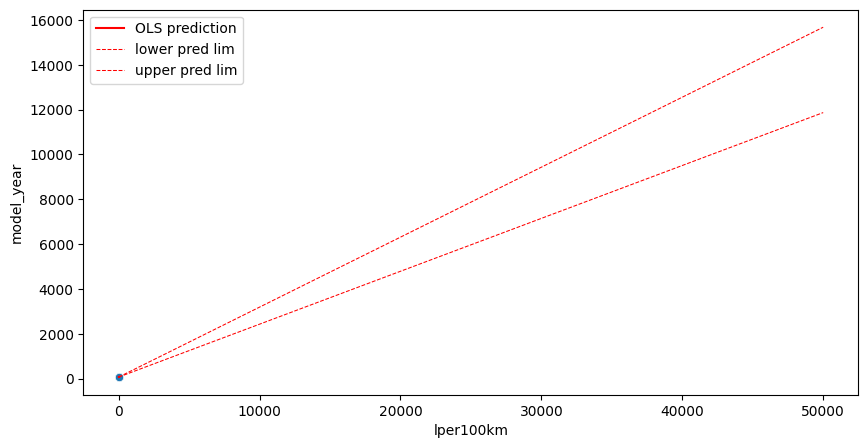

In [ ]:
xs = pd.DataFrame(np.linspace(0,50000,332), columns=['lper100km'])
print(xs)

predictions = model.get_prediction(xs)
frame = predictions.summary_frame(alpha=0.05)
lower = frame['obs_ci_lower']
upper = frame['obs_ci_upper']

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=cars, x='lper100km', y='model_year')
ax.plot(cars['lper100km'], ypred, "r", label="OLS prediction")

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)

ax.legend(loc="best")
plt.show()

In [88]:
import numpy as np
from sklearn.linear_model import LinearRegression
series = cars["lper100km"].to_numpy()
x = series.reshape(-1,1)
y = cars["model_year"]

x, y


model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")


print(f"intercept: {model.intercept_}")


print(f"slope: {model.coef_}")
y = y.to_numpy()

new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")


print(f"slope: {new_model.coef_}")


y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")
y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")
x_new = np.arange(5).reshape((-1, 1))

y_new = model.predict(x_new)
x_new, y_new


coefficient of determination: 0.33555041147055686
intercept: 69.56605278487837
slope: [0.27404272]
intercept: [69.56605278]
slope: [[0.27404272]]
predicted response:
[74.49882171 73.67669356 74.49882171 73.95073628 74.224779   73.67669356
 73.40265084 73.40265084 73.40265084 73.67669356 73.67669356 73.40265084
 73.67669356 73.40265084 76.14307802 75.59499259 74.49882171 75.32094987
 76.96520618 76.69116346 76.41712074 76.14307802 76.41712074 76.69116346
 75.32094987 72.30647997 72.30647997 72.58052269 72.03243725 76.96520618
 77.2392489  76.41712074 76.41712074 74.77286443 73.95073628 74.224779
 74.77286443 74.49882171 73.40265084 73.40265084 73.40265084 73.40265084
 72.8545654  73.12860812 73.12860812 74.49882171 75.59499259 74.77286443
 74.49882171 75.8690353  77.2392489  77.78733433 77.78733433 78.06137705
 79.15754792 76.96520618 76.69116346 76.14307802 76.41712074 75.8690353
 75.04690715 75.32094987 73.12860812 73.40265084 73.67669356 73.40265084
 74.224779   72.58052269 73.128608

(array([[0],
        [1],
        [2],
        [3],
        [4]]),
 array([69.56605278, 69.8400955 , 70.11413822, 70.38818094, 70.66222366]))

In [85]:
series = cars["model_year"].to_numpy()
x = series.reshape(-1,1)
x

array([[70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [71],
       [72],
       [72],
       [72],
       [72],
       [72],
       [72],
       [72],
       [72],
       [72],
       [72],
       [72],
       [72],
       [72],
       [72],
       [72],
       [72],
       [72],
       [72],
       [72],
       [72],

<AxesSubplot: >

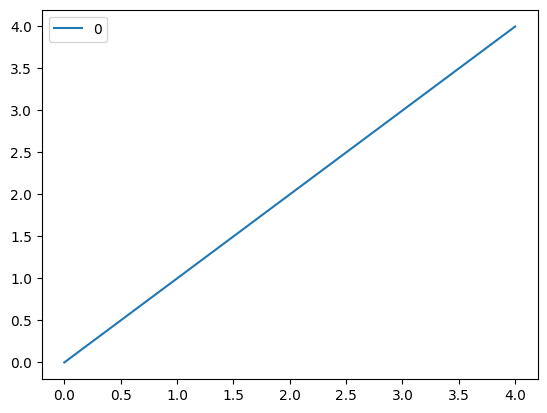

In [93]:
sns.lineplot(x_new)